# Problem

Following is sample of raw DAS data.
- Horizontal axis is the space (spatial)
- Vertial axis is the time (temporal)

![alt text](../docs/das-raw.png)

We want to design a suitable Gaussian kernel for Gaussian smoothing to hightlight a specific events with predetermined speed in DAS data. Example of Gaussian kernel:

![alt text](../docs/kernel.png)

____

# Idea

- Assume the Gaussian kernel has the ellipse shape.
- On one hand, the ellipse shape is fully determined by its bounded retangular.
- On the other hand, the bounded retangular can be determined by either its two edges AB and BC, or its two diagonal lines AC and BD.
- Let AC and BD represent the two speed limits that we desire to highlights in the DAS data.
- AC is the upper speed limit (the more horizontal, the faster). BD is the lower speed limit.

<img src="../docs/kernel-shape.png" alt="alt text" style="background-color: white;" width="500">

However, the speed limits only determine the directions of AC and BD. They do not constrain the length of AC and BD. As a result, the size of the retangular is not fixed yet (only similar, not congruent). Below is the demonstration of two similar retangulars ABCD and A'B'C'D'.

<img src="../docs/kernel-shape-elastic.png" alt="alt text" style="background-color: white;" width="500">

Therefore, apart from the speed limits (the direction of AC and BD), it's neccessary to additionally determine the height or the width of the rectangle in order to fix the size of the rectangle.

<img src="../docs/kernel-shape-size.png" alt="alt text" style="background-color: white;" width="500">

______

# Theory

### 1. Covariance Matrix of a 2D Gaussian Distribution

A 2D Gaussian distribution can be characterized by its mean vector and covariance matrix. The covariance matrix $\Sigma$ of a 2D Gaussian distribution is a $2 \times 2$ symmetric matrix that describes the variance and the correlation between the two variables $X_1$ and $X_2$:

$
\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}
$

where $\sigma_{X_1}^2$ and $\sigma_{X_2}^2$ are the variances of $X_1$ and $X_2$ respectively, and $\sigma_{X_1 X_2}$ is the covariance between $X_1$ and $X_2$.

### 2. Eigenvalues and Eigenvectors

For the covariance matrix $\Sigma$:

1. **Eigenvalues**: The eigenvalues $\lambda_1$ and $\lambda_2$ are the scalars that satisfy the characteristic equation $\det(\Sigma - \lambda I) = 0$, where $I$ is the identity matrix. The eigenvalues represent the variances along the principal components (directions) of the distribution.

2. **Eigenvectors**: The eigenvectors $\mathbf{v}_1$ and $\mathbf{v}_2$ corresponding to the eigenvalues $\lambda_1$ and $\lambda_2$ are the directions in which these variances occur. These vectors are orthogonal to each other if $\Sigma$ is symmetric.

<img src="../docs/eigenvalues-eigenvectors.png" alt="alt text" style="background-color: white;" width="500">

- The 2D Gaussian distribution shape is determined by its covariance matrix
$\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}$.
- On one hand, eigenvalues and eigenvectors can be  uniquely determined by a given $\Sigma$.
- On the other hand, the $\Sigma$ can be also uniquely determined by given eigenvalues and eigenvectors.
- So we have:
$
\Sigma = \begin{pmatrix}
\sigma_{X_1}^2 & \sigma_{X_1 X_2} \\
\sigma_{X_1 X_2} & \sigma_{X_2}^2
\end{pmatrix}
\iff \set{(\lambda_1, \lambda_2), (\mathbf{v}_1, \mathbf{v}_2)}
$
- Therefore, in order to determine $\Sigma$, it is adequate to determine $\set{(\lambda_1, \lambda_2), (\mathbf{v}_1, \mathbf{v}_2)}$
    - $\mathbf{v}_1$ and $\mathbf{v}_2$ can be determined by the average of the speed limits:
        - $\mathbf{v}_1$ has the same direction with the average of the speed limits
        - $\mathbf{v}_2$ is perpendicular with $\mathbf{v}_1$
    - $\lambda_1$ and $\lambda_2$ can be determined by the "variance" along the space or the time dimension, which has to be predetermined.



# Solution

<img src="../docs/speed-distance-time.png" alt="alt text" style="background-color: white;" width="500">

<img src="../docs/variance-space-time.png" alt="alt text" style="background-color: white;" width="500">

Inputs:
- $S_1$: Lower speed limit (km/h or m/s)
- $S_2$: Upper speed limit (km/h or m/s)
- $V_s$: Variance along space dimension (either $V_s$ or $V_t$ is inputed, not both)
- $V_t$: Variance along time dimension (either $V_s$ or $V_t$ is inputed, not both)

Logics:
- If $S_1$ and $S_2$ are originally in km/h, convert them to m/s:
    - $S_1 = \frac{S_1\times1000}{3600} = \frac{S_1}{3.6}$
    - $S_2 = \frac{S_2\times1000}{3600} = \frac{S_2}{3.6}$
- Calculate the slopes of $S_1$ and $S_2$:
    - $\theta_1 = \arctan(\frac{T_1}{D}) = \arctan(\frac{1}{S_1})$
    - $\theta_2 = \arctan(\frac{T_2}{D}) = \arctan(\frac{1}{S_2})$
    - Where $T_1$, $T_2$ and $D$ are time of $S_1$, time of $S_2$ and distance, respectively (apply formula: speed = distance/time)
- Calculate the average slope:
    - $\theta=0.5(\theta_1+\theta_2)$ (proof below)

Output:
- Eigenvector $\mathbf{v}_1$ = $[1, \tan(\theta)]$: the average direction between $S_1$ and $S_2$ (normalize to basis vectors)
- Eigenvector $\mathbf{v}_2$ = $[\tan(\theta), -1]$: perpendicular with $\mathbf{v}_1$
- Eigenvalue $\lambda_1$:
    - If ${V_s}$: $\cos(\theta) = \frac{V_s}{\lambda_1} \Longleftrightarrow \lambda_1 = \frac{V_s}{\cos(\theta)}$
    - If ${V_t}$: $\sin(\theta) = \frac{V_t}{\lambda_1} \Longleftrightarrow \lambda_1 = \frac{V_t}{\sin(\theta)}$
- Eigenvalue $\lambda_2$:
    - $\tan(\theta_1-\theta) = \frac{\lambda_2}{\lambda_1} \Longleftrightarrow \lambda_2=\tan(\theta_1-\theta) \times \lambda_1$ 

----
Proof $\theta=0.5(\theta_1+\theta_2)$

<img src="../docs/geometry.png" alt="alt text" style="background-color: white;" width="500">

Assume $a_1 \le a_2, b_1 \le b_2$. Let the length of $S_1$ and $S_2$ be $h$.

$\sin\theta_1=\frac{a}{h}, \cos\theta_1=\frac{b_2-b_1}{h}=\frac{b-2b_1}{h}$

$\cos\theta_2=\frac{b}{h}, \sin\theta_2=\frac{a_2-a_1}{h}=\frac{a-2a_1}{h}$

$\tan\theta = \frac{a_2}{b_2}
= \frac{h\sin(\theta_2)+a_1}{h\cos(\theta_1)+b_1}
= \frac{h\sin\theta_2+\frac{a-h\sin\theta_2}{2}}{h\cos\theta_1+\frac{b-h\cos\theta_1}{2}}
= \frac{2h\sin(\theta_2)+a-h\sin\theta_2}{2h\cos(\theta_1)+b-h\cos\theta_1}
= \frac{h\sin(\theta_2)+a}{2h\cos(\theta_1)+b}
= \frac{h\sin\theta_2+h\sin\theta_1}{h\cos\theta_1+h\cos\theta_2}
= \frac{\sin\theta_2+\sin\theta_1}{\cos\theta_1+\cos\theta_2}
= \frac{2\sin{\frac{\theta_1+\theta_2}{2}}\cos{\frac{\theta_1-\theta_2}{2}}}{2\cos{\frac{\theta_1+\theta_2}{2}}\cos{\frac{\theta_1-\theta_2}{2}}}
= \tan{\frac{\theta_1+\theta_2}{2}}$

----
# Implementation

In [1]:
import numpy as np
from typing import Literal, Tuple
from matplotlib import colors
import matplotlib.pyplot as plt

In [58]:
def cal_eigen(
    s1: float,
    s2: float,
    s_rate: float,
    t_rate: float,
    std_s: float = None,
    std_t: float = None,
    unit: Literal['km/h', 'm/s'] = 'km/h'  # 'km/h' or 'm/s'

) -> Tuple[float, float, float, float]:
    """Calculate the eigenvalues and eigenvectors of the covariance matrix of
    2d Gaussian distribution of two velocity vectors.

    Args:
        s1 (float): Speed of the first velocity vector.
        s2 (float): Speed of the second velocity vector.
        s_rate (float): Sampling rate of the space dimension.
        t_rate (float): Sampling rate of the time dimension.
        std_s (float, optional): Standard deviation along the space dimension.
            In meters. Defaults to None.
        std_t (float, optional): Standard deviation along the time dimension.
            In seconds. Defaults to None.
        unit (Literal['km/h', 'm/s'], optional): Unit of the speed. Defaults to
            'km/h'.

    Returns:
        Tuple[float, float, float, float]: Eigenvalues and eigenvectors of the
            covariance matrix.
    """
    if ((std_t is None and std_s is None)
        or (std_t is not None and std_s is not None)):
        raise ValueError(
            "Either 'std_t' or 'std_s' must be provided, but not both.")
    # convert to m/s
    if unit == 'km/h':
        s1 = s1 / 3.6
        s2 = s2 / 3.6
    # calculate angle
    theta1 = np.arctan(1 / s1)
    theta2 = np.arctan(1 / s2)
    theta = 0.5 * (theta1 + theta2)
    # calculate eigenvalues and eigenvectors
    eigvec_1 = [1, np.tan(theta)]
    eigvec_2 = [np.tan(theta), -1]
    if std_s is not None:
        var_s = (std_s / s_rate) ** 2  # adjust with the rate before squaring
        eigval_1 = var_s / np.cos(theta)
    if std_t is not None:
        var_t = (std_t / t_rate) ** 2  # adjust with the rate before squaring
        eigval_1 = var_t / np.sin(theta)
    eigval_2 = np.tan(theta1 - theta) * eigval_1
    return eigvec_1, eigvec_2, eigval_1, eigval_2

In [73]:
# test the function
s_rate=0.25
t_rate=100

eigvec_1, eigvec_2, eigval_1, eigval_2 = cal_eigen(
    s1=89,
    s2=90,
    s_rate=s_rate,
    t_rate=t_rate,
    std_s=10,
    # std_t=10,
    unit='km/h'
)
eigvec_1, eigvec_2, eigval_1, eigval_2

([1, 0.04022471707311009],
 [0.04022471707311009, -1],
 1601.29389911123,
 0.35926003287020647)

In [74]:
def cal_cov_mat(
    eigvec_1: float,
    eigvec_2: float,
    eigval_1: float,
    eigval_2: float
) -> np.ndarray:
    """Calculate the covariance matrix from the eigenvalues and eigenvectors.

    Args:
        eigvec_1 (float): The first eigenvector.
        eigvec_2 (float): The second eigenvector.
        eigval_1 (float): The first eigenvalue.
        eigval_2 (float): The second eigenvalue.

    Returns:
        np.ndarray: The covariance matrix.
    """
    # Convert the eigenvectors to a 2x2 array (each column is an eigenvector)
    eigvecs = np.array([eigvec_1, eigvec_2]).T
    
    # Create the diagonal matrix of eigenvalues
    eigvals = np.diag([eigval_1, eigval_2])
    
    # Calculate the covariance matrix
    cov_mat = eigvecs @ eigvals @ eigvecs.T
    
    return cov_mat

In [75]:
# test the function
cov_mat = cal_cov_mat(eigvec_1, eigvec_2, eigval_1, eigval_2)
cov_mat

array([[1601.2944804 ,   64.39714291],
       [  64.39714291,    2.95019818]])

In [76]:
def create_gauss_kernel(
    cov_mat: np.ndarray,
    s_rate: float,
    t_rate: float
) -> np.ndarray:
    """Create Gaussian kernel from covariance matrix

    Args:
        cov_mat (np.ndarray): Covariance matrix.
        s_rate (float): Spatial sampling rate.
        t_rate (float): Temporal sampling rate.

    Returns:
        np.ndarray: Gaussian kernel.
    """
    # Calculate the size of the kernel
    size_s = np.sqrt(cov_mat[0][0]) * 2 * 1 * s_rate  # 2 sides * 2 std
    size_t = np.sqrt(cov_mat[1][1]) * 2 * 1 * t_rate  # 2 sides * 2 std
    size_s = int(round(size_s, 0))
    size_t = int(round(size_t, 0))
    # Create grid of points
    range_s = np.arange(-size_s // 2, size_s // 2 + 1) / s_rate
    range_t = np.arange(-size_t // 2, size_t // 2 + 1) / t_rate
    x, y = np.meshgrid(range_s, range_t)
    # Calculate the Gaussian values
    det_cov_mat = np.linalg.det(cov_mat)  # determinant of covariance matrix
    inv_cov_mat = np.linalg.inv(cov_mat)  # inverse covariance matrix
    exponent = -0.5 * (
        inv_cov_mat[0, 0] * x**2 +
        2 * inv_cov_mat[0, 1] * x * y +
        inv_cov_mat[1, 1] * y**2
    )
    gauss_kernel = np.exp(exponent) / (2 * np.pi * np.sqrt(det_cov_mat))
    # Normalize the filter
    gauss_kernel /= np.sum(gauss_kernel)
    return gauss_kernel

In [77]:
# test the function
gauss_kernel = create_gauss_kernel(
    cov_mat,
    s_rate=s_rate,
    t_rate=t_rate
)
print(gauss_kernel.shape)

(345, 21)


In [78]:
def heatmap_filter(
    kernel: np.ndarray,
    s_rate: float,
    t_rate: float,
) -> None:
    """Visualize kernel in heatmap.

    Args:
        kernel (np.ndarray): Kernel array.
        s_rate (float): Spatial sampling rate.
        t_rate (float): Temporal sampling rate.
    """
    percentile = np.quantile(np.abs(kernel), 0.95)
    vmin = 0
    vmax = percentile
    norm = colors.TwoSlopeNorm(
        vmin=vmin,
        vmax=vmax,
        vcenter=(vmin + vmax) / 2
    )
    cmap = 'Greens'
    plt.imshow(
        X=kernel,
        aspect=kernel.shape[1] / kernel.shape[0],  # square
        cmap=cmap,
        norm=norm,
        interpolation='none',  # no interpolation
        origin='lower'
    )
    plt.xlabel('Channels')
    plt.ylabel('Seconds')

    # Get the current tick locations
    current_xticks = plt.gca().get_xticks()[1:-1]
    current_yticks = plt.gca().get_yticks()[1:-1]

    # Create new tick locations by dividing by sampling rate
    new_xticks = current_xticks / s_rate
    new_yticks = current_yticks / t_rate

    # Set the new tick locations
    plt.gca().set_xticks(current_xticks)
    plt.gca().set_xticklabels(new_xticks)

    plt.gca().set_yticks(current_yticks)
    plt.gca().set_yticklabels(new_yticks)

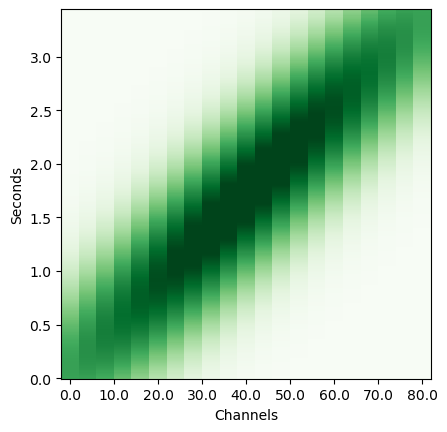

In [79]:
# test the function
heatmap_filter(gauss_kernel, s_rate=s_rate, t_rate=t_rate)